In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from keras import models
from keras import layers


In [ ]:
boston = tf.keras.datasets.boston_housing

In [ ]:
dir(boston)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [ ]:
boston_data = boston.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# After loading data
(x_train, y_train), (x_test, y_test) = boston.load_data()

# Define feature names
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
    'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]

# Create dataframe
df = pd.DataFrame(x_train, columns=column_names)

# Add the target PRICE
df['PRICE'] = y_train

In [ ]:
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())

(404, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.745111   11.480198   11.104431    0.061881    0.557356    6.267082   
std      9.240734   23.767711    6.811308    0.241238    0.117293    0.709788   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081437    0.000000    5.130000    0.000000    0.453000    5.874750   
50%      0.268880    0.000000

<Axes: >

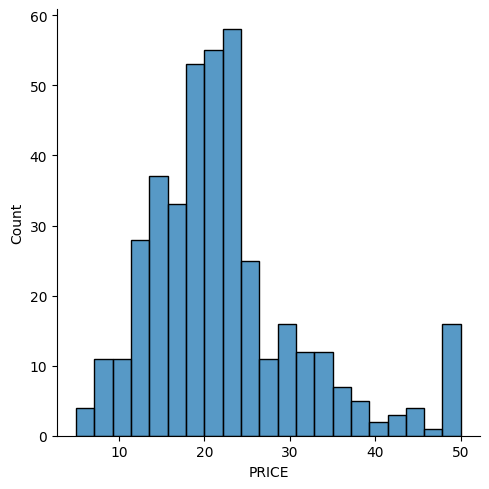

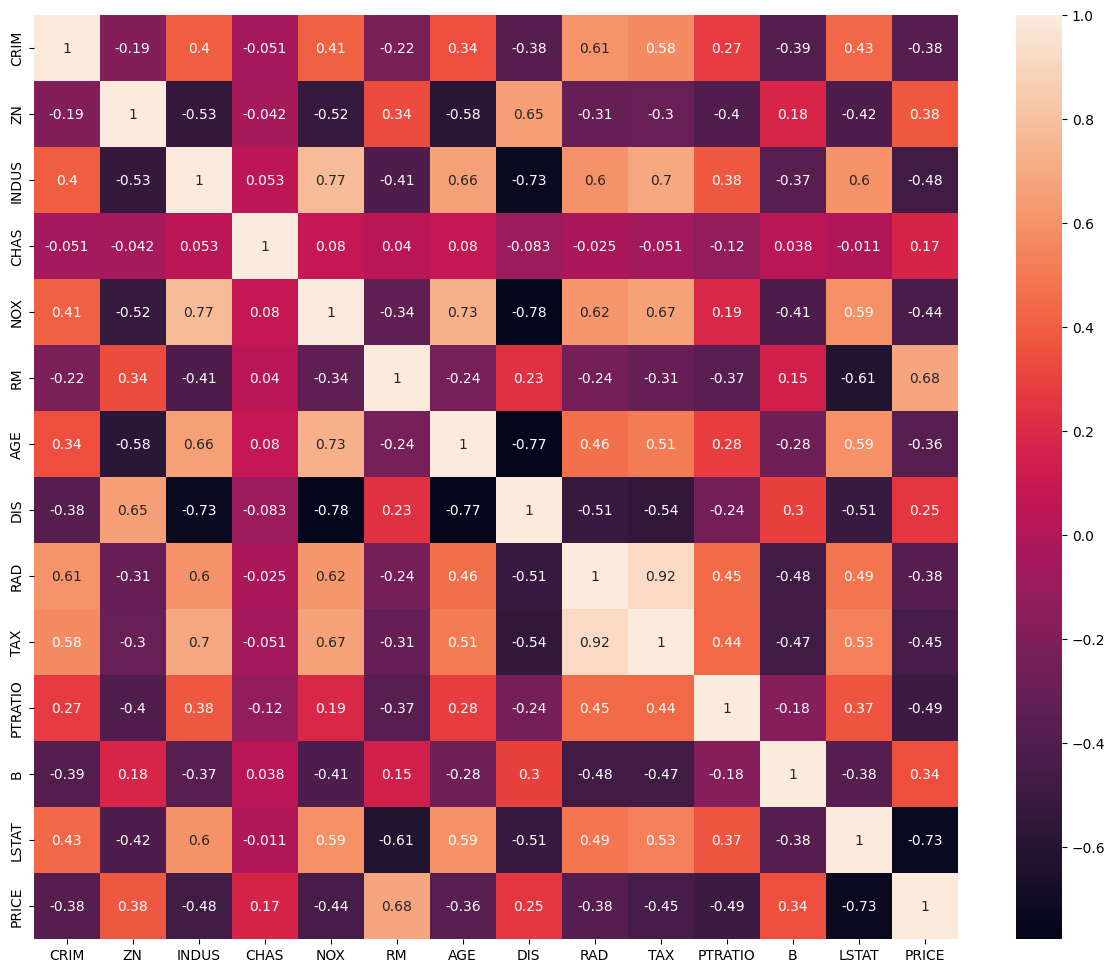

In [ ]:
sns.displot(df.PRICE)

correlation = df.corr()
correlation.loc['PRICE']

fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)


In [ ]:
# Assuming 'data' already has your features + PRICE column
X = df.iloc[:, :-1]   # all columns except last
y = df['PRICE']       # target column

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalizing (Standardizing) the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim =13))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 640.8138
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 628.7693
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 573.1724
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 495.9156 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 274.9656 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 109.6945 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 83.3507
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 53.6015  
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.1563  
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36.0338 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.4121 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.1897 
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.8066 
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.3900 
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━

In [ ]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score = ", r2)
print("RMSE Score = ", rmse)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2 Score =  0.7126019521836117
RMSE Score =  3.84919634015561
